In [1]:
import pandas as pd

from SMILESX import embeddingvis, token, interpret
%matplotlib inline

RDKit WARNING: [10:47:59] Enabling RDKit 2019.09.2 jupyter extensions


#### Definition of data

In [2]:
validation_data_dir = "./validation_data/"

In [3]:
extension = '.csv'

In [4]:
data_name = 'FreeSolv' # FreeSolv, ESOL, Lipophilicity
prop_tag = ''

In [5]:
if data_name == 'FreeSolv':
    data_filename = 'FreeSolv_SAMPL'
    prop_tag = 'expt'
elif data_name == 'ESOL':
    data_filename = 'ESOL_delaney-processed'
    prop_tag = 'measured log solubility in mols per litre'
elif data_name == 'Lipophilicity':
    data_filename = 'Lipophilicity'
    prop_tag = 'exp'
else:
    data_filename = data_name
    prop_tag = prop_tag

In [6]:
sol_data = pd.read_csv(validation_data_dir+data_filename+extension)

In [7]:
sol_data.head(3)

,Unnamed: 0,iupac,smiles,expt,calc
0,0,"4-methoxy-N,N-dimethyl-benzamide",COc1ccc(C(=O)N(C)C)cc1,-11.01,-9.625
1,1,methanesulfonyl chloride,CS(=O)(=O)Cl,-4.87,-6.219
2,2,3-methylbut-1-ene,C=CC(C)C,1.83,2.452


In [8]:
sol_data = sol_data[['smiles',prop_tag]]

In [9]:
sol_data.head()

,smiles,expt
0,COc1ccc(C(=O)N(C)C)cc1,-11.01
1,CS(=O)(=O)Cl,-4.87
2,C=CC(C)C,1.83
3,CCc1cnccn1,-5.45
4,CCCCCCCO,-4.21


In [10]:
sol_data.shape

(642, 2)

#### Embedding Visualization

***SMILES_X for embedding visualization starts...***


******
***Fold #773630 initiated...***
******
***Sampling and splitting of the dataset.***

Scaler: RobustScaler(copy=True, quantile_range=(5.0, 95.0), with_centering=True,
             with_scaling=True)
Train/valid/test splits: 0.80/0.10/0.10


***Data augmentation.***

Enumerated SMILES:
	Training set: 4283
	Validation set: 499
	Test set: 573

***Tokenization of SMILES.***

Examples of tokenized SMILES from a training set:
[[' ', 'C', 'c', '1', 'c', 'c', 'c', 'c', 'n', '1', ' '], [' ', 'c', '1', '(', 'C', ')', 'c', 'c', 'c', 'c', 'n', '1', ' '], [' ', 'c', '1', 'c', 'c', 'c', 'n', 'c', '1', 'C', ' '], [' ', 'c', '1', 'c', 'c', 'n', 'c', '(', 'C', ')', 'c', '1', ' '], [' ', 'c', '1', 'c', 'n', 'c', '(', 'C', ')', 'c', 'c', '1', ' ']]

['P', '[S+2]', '=', 'C', 'S', 's', 'c', '4', '[C@H]', '[N+]', 'O', '2', '[C@]', 'Cl', '[C@@]', '[C@@H]', '1', 'N', '(', ')', 'I', 'n', 'F', '[O-]', '\\', '[nH]', '#', '3', 'Br', ' ', '/', '-']
Numbe

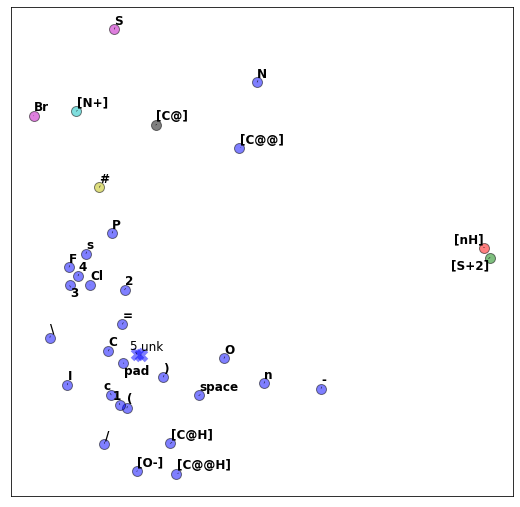

In [11]:
embeddingvis.Embedding_Vis(data=sol_data, 
                          data_name=data_name, 
                          data_units='', 
                          k_fold_number = 1,
                          k_fold_index = 0,
                          augmentation = True, 
                          outdir = "./data/", 
                          affinity_propn = True)

#### Find tokens in SMILES

In [12]:
token.TokensFinder(data=sol_data, 
                   augmentation = False, 
                   token_tofind = '[nH]', 
                   verbose = 0)

***************************************
***SMILES_X token's finder starts...***
***************************************

No data augmentation required.
Tokenization of provided SMILES.

>>> The finder is processing the search... >>>

13 SMILES found with [nH] token in the training set.

**********************************************************
***SMILES_X token's finder has terminated successfully.***
**********************************************************



#### SMILES inference interpretation

***SMILES_X Interpreter starts...***


******
***Fold #773630 initiated...***
******
***Sampling and splitting of the dataset.***

Scaler: RobustScaler(copy=True, quantile_range=(5.0, 95.0), with_centering=True,
             with_scaling=True)
Train/valid/test splits: 0.80/0.10/0.10


***Data augmentation.***

Enumerated SMILES:
	Training set: 4283
	Validation set: 499
	Test set: 573

***Tokenization of SMILES.***

Examples of tokenized SMILES from a training set:
[[' ', 'C', 'c', '1', 'c', 'c', 'c', 'c', 'n', '1', ' '], [' ', 'c', '1', '(', 'C', ')', 'c', 'c', 'c', 'c', 'n', '1', ' '], [' ', 'c', '1', 'c', 'c', 'c', 'n', 'c', '1', 'C', ' '], [' ', 'c', '1', 'c', 'c', 'n', 'c', '(', 'C', ')', 'c', '1', ' '], [' ', 'c', '1', 'c', 'n', 'c', '(', 'C', ')', 'c', 'c', '1', ' ']]

['P', '[S+2]', '=', 'C', 'S', 's', 'c', '4', '[C@H]', '[N+]', 'O', '2', '[C@]', 'Cl', '[C@@]', '[C@@H]', '1', 'N', '(', ')', 'I', 'n', 'F', '[O-]', '\\', '[nH]', '#', '3', 'Br', ' ', '/', '-']
Number of tokens only

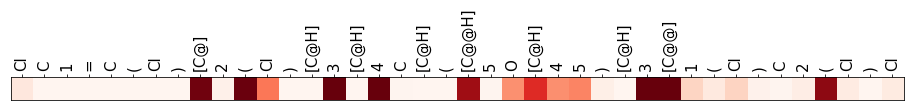

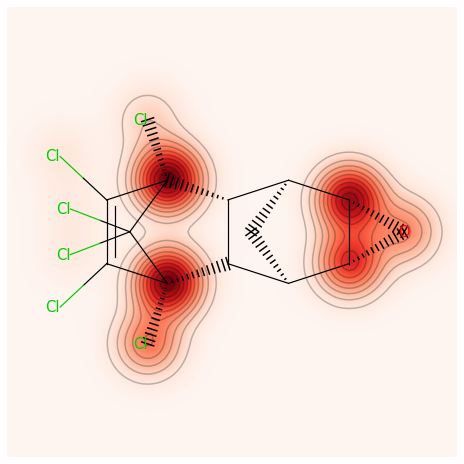

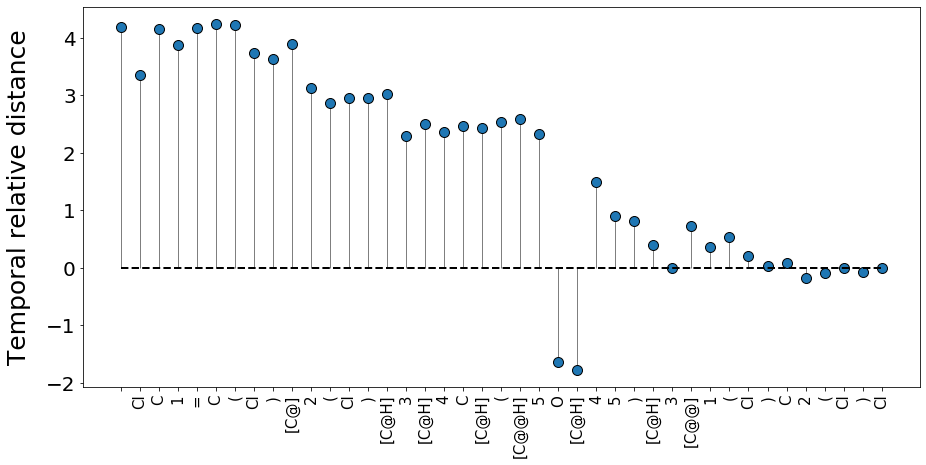

In [13]:
interpret.Interpretation(data=sol_data, 
                         data_name=data_name, 
                         data_units='', 
                         k_fold_number = 1,
                         k_fold_index = 0,
                         augmentation = True, 
                         outdir = "./data/", 
                         smiles_toviz = 'ClC1=C(Cl)[C@]2(Cl)[C@H]3[C@H]4C[C@H]([C@@H]5O[C@@H]54)[C@H]3[C@@]1(Cl)C2(Cl)Cl', 
                         font_size = 15, 
                         font_rotation = 'vertical')